## Manipulação de arquivos de imagens FITS de galaxias

#### Baixar os dados , de tratamento para podermos inserir as analises e logo apos abiremos o arquivo e, usamos o  matplotlib para visualizar a imagem com diferentes escalas de cores e alongamentos e para criar o histogramas.

###### Inseridos modulos a serem usados

In [195]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from astropy.io import fits

from astropy.utils.data import download_file
from matplotlib.colors import LogNorm

###### Realizando o download dos dados do aglomerado de estrelas M13 - O grande aglomerado globular

#### Realizando dados do aglomerado Globular - (M13)

In [196]:
arquivo_image = download_file('http://data.astropy.org/tutorials/FITS-images/stacked_M13_blue.fits',cache=True)


#### Abrindo arquivos carregados

In [197]:
hdu_list = fits.open(arquivo_image)
hdu_list.info()

Filename: /home/ovini/.astropy/cache/download/url/540edafb8665767173dc76e12e52fad9/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (1392, 1040)   float64   


##### As informações da imagem estão localizadas no PRIMARY bloco. Os blocos são numerados e podem ser acessados ​​por indexação hdu_list.

In [198]:
img_data = hdu_list[0].data

##### Os dados serão armazenados em uma array numpy 2D, apartir deste posnto iremos obter a dimenção da imagem

In [199]:
print(type(img_data))
print(img_data.shape)

<class 'numpy.ndarray'>
(1040, 1392)


#### Apartir deste ponto iremos fechar o arquivo FITS, por que já isenrimos todos os dados necessario em uma varivel

In [200]:
hdu_list.close()

#### Não sera necessario axaminar ocabeçalho fits , poderemos ativar o gits.getdata para ignorar as etapas anteriores.

In [201]:
img_data_base = fits.getdata(arquivo_image)

##### Os dados da imagem são mantidos em uma matriz numpy 2-D. Também podemos ver o número de pixels na imagem imprimindo o formato do array 2-D. Isso nos mostra que a imagem tem 893 x 891 pixels.



In [202]:
print(type(img_data_base))
print(img_data_base.shape)

<class 'numpy.ndarray'>
(1040, 1392)


#### Visualizando os dados da imagem e obtendo estatísticas básicas

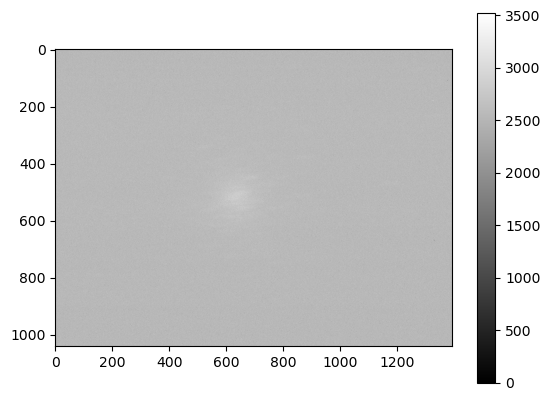

In [203]:
plt.imshow(img_data_base, cmap='gray')
plt.colorbar()

#### Obtendo dados de saida da imagem

In [204]:
print('Minimo  :',np.min(img_data_base))
print('Maximo : ',np.max(img_data_base))
print('Media : ',np.mean(img_data_base))

Minimo  : 0.0
Maximo :  3522.0
Media :  2544.96438232206


#### Para fazer um histograma com matplotlib.pyplot.hist(), precisaremos converter os dados de um array 2D em algo unidimensional.

#### Nesse caso, vamos usar the ndarray.flatten()para retornar um array numpy 1D. Aqui usamos as instruções de impressão para verificar se o array "achatado" é um array numpy e que o número de entradas no array achatado é igual ao número total de pixels na imagem (ou seja, 893 x 891 = 795663 pixels no total ).

In [205]:
print(type(img_data_base.flatten()))
print(img_data_base.flatten().shape)


<class 'numpy.ndarray'>
(1447680,)


##### Exibindo histograma 

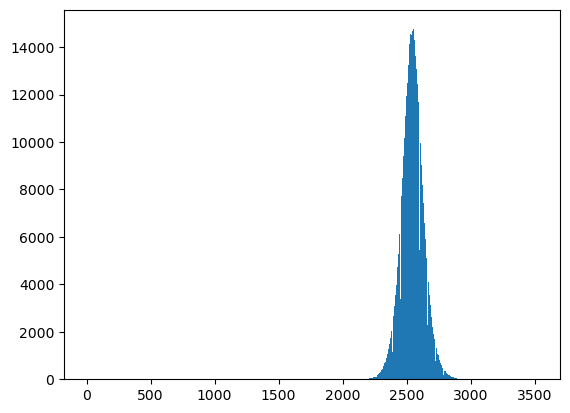

In [206]:
histogram = plt.hist(img_data_base.flatten(), bins='auto')


### Exibindo a imagem com uma escala logarítmica

##### E se quisermos usar uma escala de cores logarítmica? Para fazer isso, precisaremos carregar o LogNormobjeto de matplotlib.

[Text(1, 5000.0, '5,000'),
 Text(1, 10000.0, '10,000'),
 Text(1, 20000.0, '20,000')]

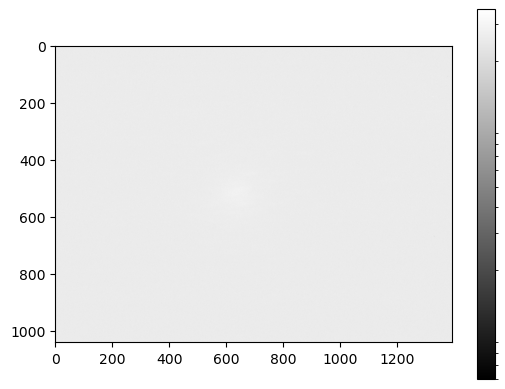

In [207]:
plt.imshow(img_data_base, cmap='gray', norm=LogNorm())
cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])
